# Principal Component Analysis - Project Exercise 

-----
-----

## GOAL: Figure out which handwritten digits are most differentiated with PCA.

**Imagine you are working on an image recognition service for a postal service. It would be very useful to be able to read in the digits automatically, even if they are handwritten. (Quick note, this is very much how modern postal services work for a long time now and its actually more accurate than a human). The manager of the postal service wants to know which handwritten numbers are the hardest to tell apart, so he can focus on getting more labeled examples of that data. You will have a dataset of hand written digits (a very famous data set) and you will perform PCA to get better insight into which numbers are easily separable from the rest.**

-----
-----

# Data

    Background:

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


#### Data Set Information from Original Authors:

We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

## Complete the Tasks in bold below

**TASK: Run the cells below to import the libraries and relevant data set.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
digits = pd.read_csv('https://raw.githubusercontent.com/fellmir/pyMachineLearningMasterclass/main/input_data/digits.csv')

In [4]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [6]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
digits.tail()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


In [8]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pixel_0_0     1797 non-null   float64
 1   pixel_0_1     1797 non-null   float64
 2   pixel_0_2     1797 non-null   float64
 3   pixel_0_3     1797 non-null   float64
 4   pixel_0_4     1797 non-null   float64
 5   pixel_0_5     1797 non-null   float64
 6   pixel_0_6     1797 non-null   float64
 7   pixel_0_7     1797 non-null   float64
 8   pixel_1_0     1797 non-null   float64
 9   pixel_1_1     1797 non-null   float64
 10  pixel_1_2     1797 non-null   float64
 11  pixel_1_3     1797 non-null   float64
 12  pixel_1_4     1797 non-null   float64
 13  pixel_1_5     1797 non-null   float64
 14  pixel_1_6     1797 non-null   float64
 15  pixel_1_7     1797 non-null   float64
 16  pixel_2_0     1797 non-null   float64
 17  pixel_2_1     1797 non-null   float64
 18  pixel_2_2     1797 non-null 

In [9]:
digits.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
pixel_7_4,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
pixel_7_5,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
pixel_7_6,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0
pixel_7_7,1797.0,0.364496,1.860122,0.0,0.0,0.0,0.0,16.0


In [10]:
digits.isnull().sum()

pixel_0_0       0
pixel_0_1       0
pixel_0_2       0
pixel_0_3       0
pixel_0_4       0
               ..
pixel_7_4       0
pixel_7_5       0
pixel_7_6       0
pixel_7_7       0
number_label    0
Length: 65, dtype: int64

In [11]:
digits.shape

(1797, 65)

In [12]:
digits.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'number_label'],
      dtype='object')

**TASK: Create a new DataFrame called *pixels* that consists only of the pixel feature values by dropping the number_label column.**

In [13]:
# CODE HERE
pixels = digits.drop('number_label', axis=1)

In [14]:
pixels

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Displaying an Image

**TASK: Grab a single image row representation by getting the first row of the pixels DataFrame.**

In [17]:
# CODE HERE
first_pixel = pixels.iloc[0]

In [18]:
first_pixel

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

**TASK: Convert this single row Series into a numpy array.**

In [22]:
# CODE HERE
first_pixel = np.array(first_pixel)

In [23]:
first_pixel

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**TASK: Reshape this numpy array into an (8,8) array.**

In [24]:
# CODE HERE
first_pixel.shape

(64,)

(64,)

In [26]:
first_pixel = np.reshape(first_pixel, (8,8))

In [27]:
first_pixel

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**TASK: Use Matplotlib or Seaborn to display the array as an image representation of the number drawn. Remember your palette or cmap choice would change the colors, but not the actual pixel values.**

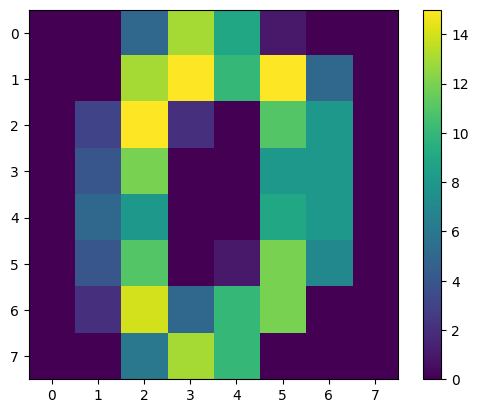

In [30]:
# CODE HERE
plt.imshow(first_pixel, cmap='viridis')
plt.colorbar()

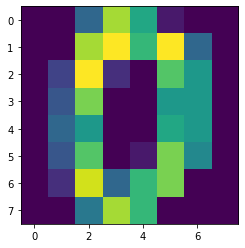

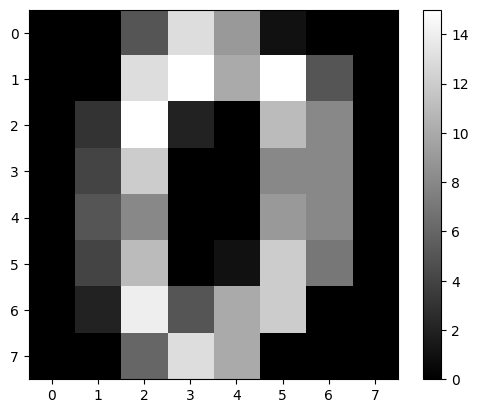

In [31]:
plt.imshow(first_pixel, cmap='gray')
plt.colorbar()

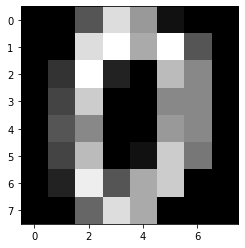

<Axes: >

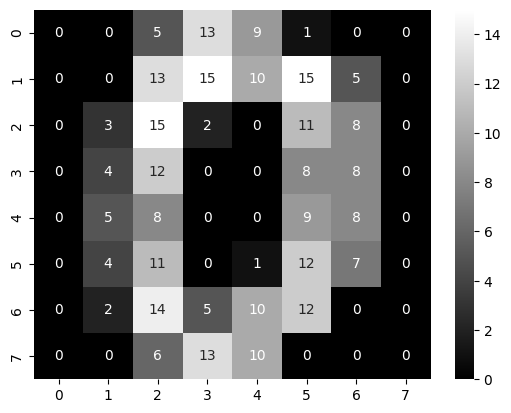

In [34]:
sns.heatmap(first_pixel, cmap='gray', annot=True)

<AxesSubplot:>

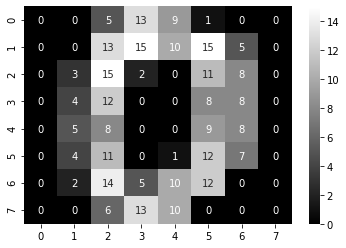

------

Now let's move on to PCA.

## Scaling Data

**TASK: Use Scikit-Learn to scale the pixel feature dataframe.**

In [35]:
# CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

first_pixel_scaled = scaler.fit_transform(first_pixel)

In [36]:
first_pixel_scaled

array([[ 0.        , -1.1717002 , -1.57142857,  1.13554995,  0.83862787,
        -1.49255579, -1.24807544,  0.        ],
       [ 0.        , -1.1717002 ,  0.71428571,  1.45999279,  1.04828484,
         1.29354835,  0.13867505,  0.        ],
       [ 0.        ,  0.39056673,  1.28571429, -0.64888568, -1.04828484,
         0.4975186 ,  0.97072534,  0.        ],
       [ 0.        ,  0.91132238,  0.42857143, -0.97332853, -1.04828484,
        -0.09950372,  0.97072534,  0.        ],
       [ 0.        ,  1.43207802, -0.71428571, -0.97332853, -1.04828484,
         0.09950372,  0.97072534,  0.        ],
       [ 0.        ,  0.91132238,  0.14285714, -0.97332853, -0.83862787,
         0.69652603,  0.69337525,  0.        ],
       [ 0.        , -0.13018891,  1.        , -0.16222142,  1.04828484,
         0.69652603, -1.24807544,  0.        ],
       [ 0.        , -1.1717002 , -1.28571429,  1.13554995,  1.04828484,
        -1.69156322, -1.24807544,  0.        ]])

In [37]:
scaler = StandardScaler()

pixels_scaled = scaler.fit_transform(pixels)

In [38]:
pixels_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## PCA

**TASK: Perform PCA on the scaled pixel data set with 2 components.**

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pixels_scaled_pca = pca.fit_transform(pixels_scaled)

In [40]:
pixels_scaled_pca

array([[ 1.91421108, -0.95448983],
       [ 0.58898905,  0.9246174 ],
       [ 1.30203513, -0.317222  ],
       ...,
       [ 1.0225944 , -0.14793045],
       [ 1.07606184, -0.38093804],
       [-1.25771005, -2.22758654]])

**TASK: How much variance is explained by 2 principal components.**

In [42]:
# CODE HERE
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [43]:
np.sum(pca.explained_variance_ratio_)

0.21594970498246838

0.21594970492246052

**TASK: Create a scatterplot of the digits in the 2 dimensional PCA space, color/label based on the original number_label column in the original dataset.**

Text(0.5, 1.0, 'PCA Scatterplot Colored by Number Label')

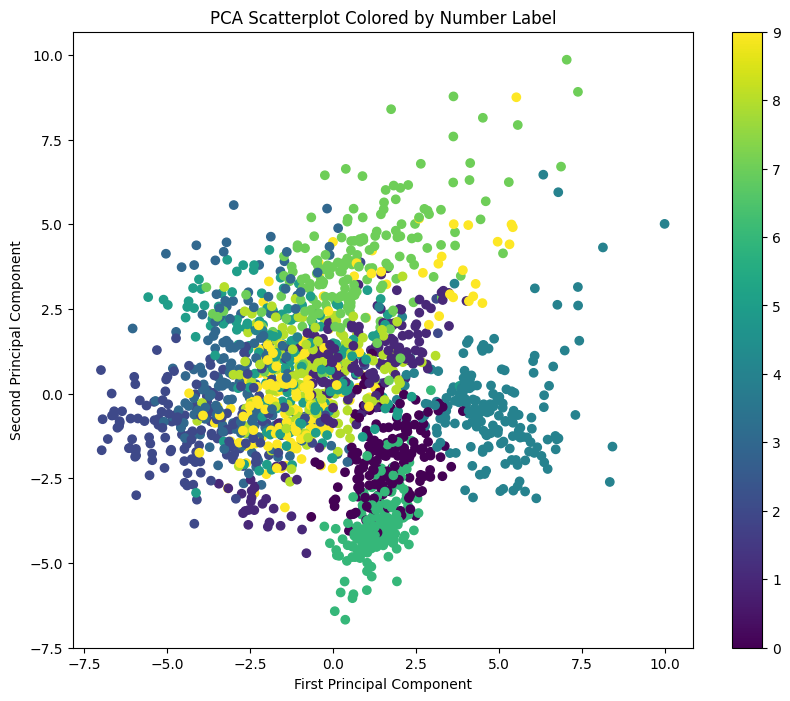

In [47]:
# CODE HERE
labels = digits['number_label']

plt.figure(figsize=(10,8))
scatter = plt.scatter(pixels_scaled_pca[:, 0], pixels_scaled_pca[:, 1], c=labels)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatterplot Colored by Number Label')

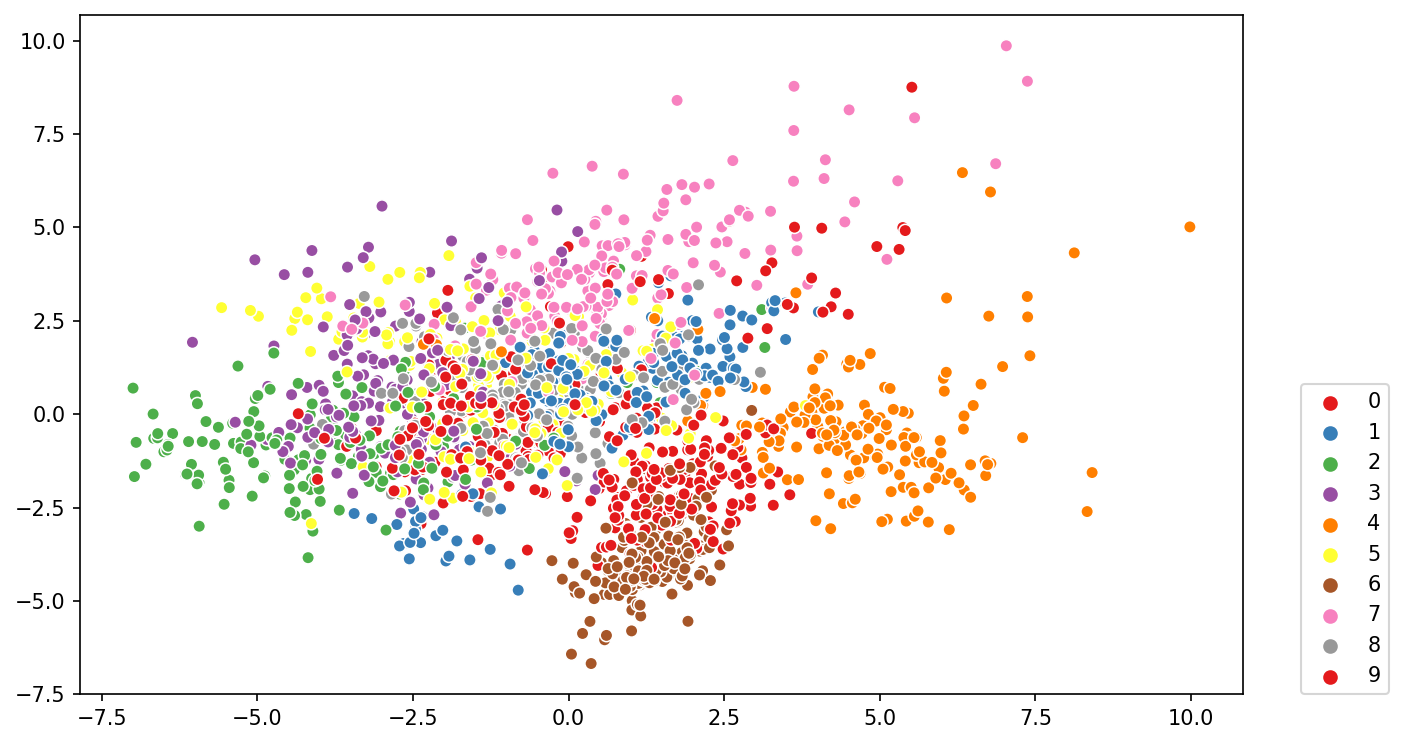

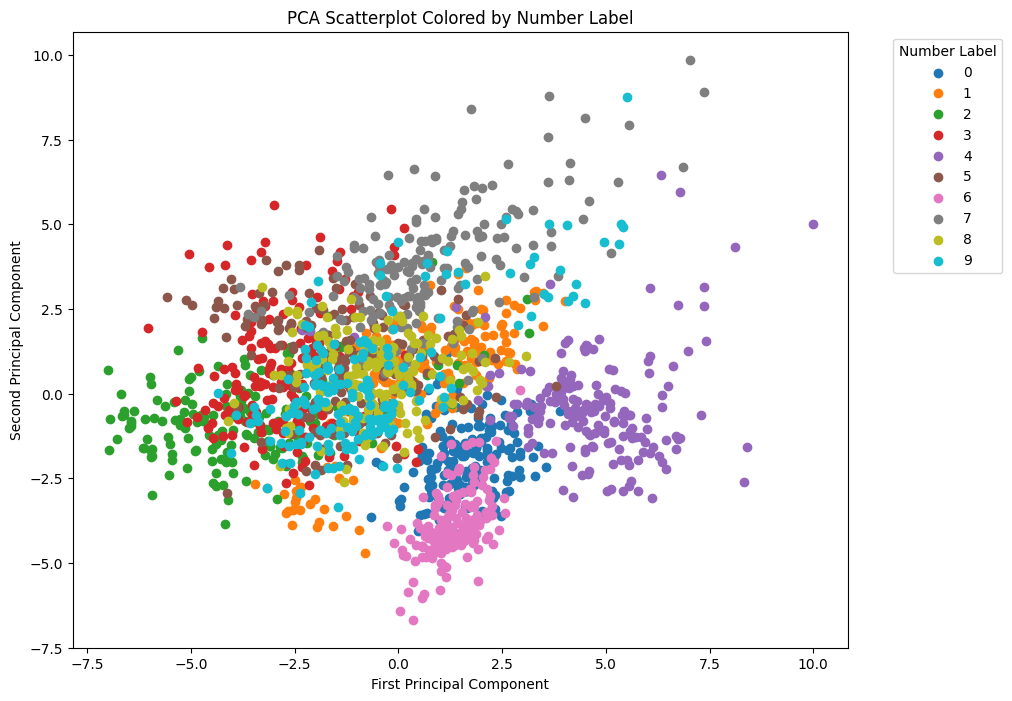

In [50]:
from matplotlib import colors as mcolors

distinct_labels = sorted(digits['number_label'].unique())
cmap = plt.cm.tab10

plt.figure(figsize=(10,8))

for i, label in enumerate(distinct_labels):
    plt.scatter(pixels_scaled_pca[labels==label, 0], pixels_scaled_pca[labels==label, 1], 
                color=cmap(i % 10), label=label)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatterplot Colored by Number Label')
plt.legend(title='Number Label')
plt.legend(title='Number Label', bbox_to_anchor=(1.05, 1), loc='upper left')

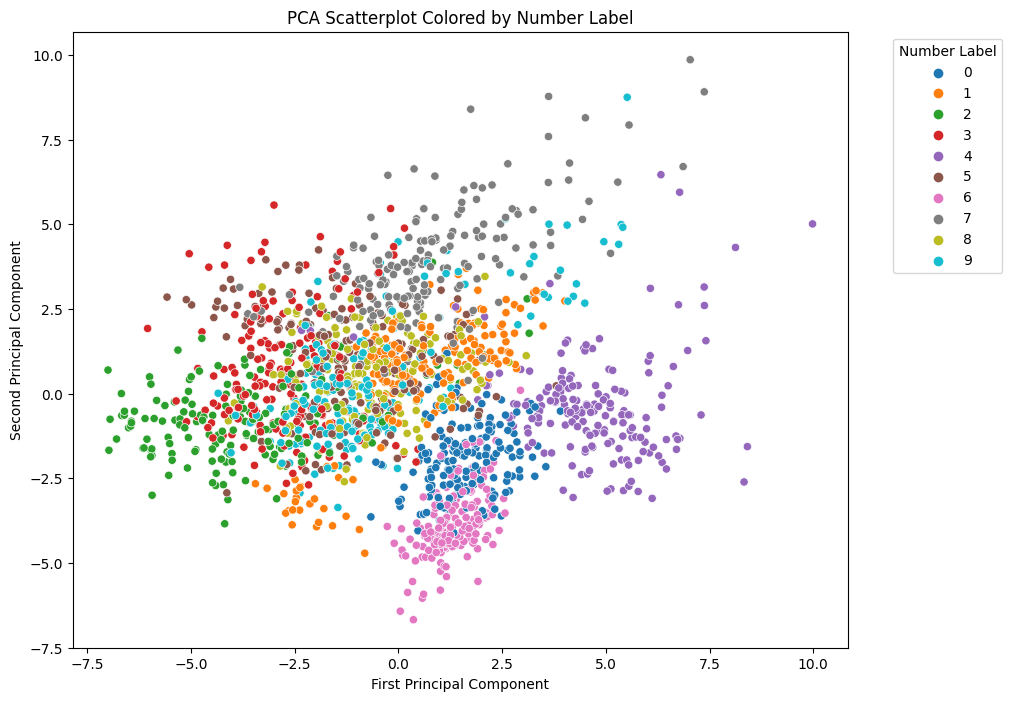

In [51]:
df = pd.DataFrame(pixels_scaled_pca, columns=['First Principal Component', 'Second Principal Component'])
df['Number Label'] = labels.values

plt.figure(figsize=(10,8))

palette = [mcolors.TABLEAU_COLORS[key] for key in mcolors.TABLEAU_COLORS.keys()]

sns.scatterplot(data=df, x='First Principal Component', y='Second Principal Component', 
                hue='Number Label', palette=palette)

plt.title('PCA Scatterplot Colored by Number Label')
plt.legend(title='Number Label')
plt.legend(title='Number Label', bbox_to_anchor=(1.05, 1), loc='upper left')

**TASK: Which numbers are the most "distinct"?**

In [62]:
# You should see label #4 as being the most separated group, 
# implying its the most distinct, similar situation for #2, #6 and #9.

In [52]:
from scipy.spatial.distance import pdist, squareform

mean_pca_coords = {label: np.mean(pixels_scaled_pca[labels==label], axis=0) for label in distinct_labels}

mean_pca_array = np.array(list(mean_pca_coords.values()))

distances = pdist(mean_pca_array, metric='euclidean')

dist_matrix = squareform(distances)

print(dist_matrix)

[[0.         2.68686392 5.43156578 5.06859254 3.40580588 4.14163499
  1.95996335 5.83790636 3.34356044 3.2716591 ]
 [2.68686392 0.         4.28616821 3.19268884 4.25422791 1.85013608
  4.43467761 3.37679168 1.07497481 1.12888309]
 [5.43156578 4.28616821 0.         1.64254211 8.30273132 2.86680935
  5.89359238 6.3658332  3.29058571 3.18837388]
 [5.06859254 3.19268884 1.64254211 0.         7.42903107 1.43640273
  6.06232718 4.75628876 2.11772357 2.07862406]
 [3.40580588 4.25422791 8.30273132 7.42903107 0.         6.1011658
  4.85400202 5.67043965 5.32119791 5.35053057]
 [4.14163499 1.85013608 2.86680935 1.43640273 6.1011658  0.
  5.50645156 3.57761028 0.82816525 0.87228375]
 [1.95996335 4.43467761 5.89359238 6.06232718 4.85400202 5.50645156
  0.         7.72906842 4.81396453 4.70024275]
 [5.83790636 3.37679168 6.3658332  4.75628876 5.67043965 3.57761028
  7.72906842 0.         3.58872594 3.74547862]
 [3.34356044 1.07497481 3.29058571 2.11772357 5.32119791 0.82816525
  4.81396453 3.588725

In [54]:
dist_df = pd.DataFrame(dist_matrix, index=distinct_labels, columns=distinct_labels)

print(dist_df)

          0         1         2         3         4         5         6  \
0  0.000000  2.686864  5.431566  5.068593  3.405806  4.141635  1.959963   
1  2.686864  0.000000  4.286168  3.192689  4.254228  1.850136  4.434678   
2  5.431566  4.286168  0.000000  1.642542  8.302731  2.866809  5.893592   
3  5.068593  3.192689  1.642542  0.000000  7.429031  1.436403  6.062327   
4  3.405806  4.254228  8.302731  7.429031  0.000000  6.101166  4.854002   
5  4.141635  1.850136  2.866809  1.436403  6.101166  0.000000  5.506452   
6  1.959963  4.434678  5.893592  6.062327  4.854002  5.506452  0.000000   
7  5.837906  3.376792  6.365833  4.756289  5.670440  3.577610  7.729068   
8  3.343560  1.074975  3.290586  2.117724  5.321198  0.828165  4.813965   
9  3.271659  1.128883  3.188374  2.078624  5.350531  0.872284  4.700243   

          7         8         9  
0  5.837906  3.343560  3.271659  
1  3.376792  1.074975  1.128883  
2  6.365833  3.290586  3.188374  
3  4.756289  2.117724  2.078624  
4  5

-----------
---------

## Bonus Challenge 

**TASK: Create an "interactive" 3D plot of the result of PCA with 3 principal components. Lot's of ways to do this, including different libraries like plotly or bokeh, but you can actually do this just with Matplotlib and Jupyter Notebook. Search Google and StackOverflow if you get stuck, lots of solutions are posted online.**

In [55]:
# CODE HERE
pca = PCA(n_components=3)

pixels_scaled_pca_3d = pca.fit_transform(pixels)

In [56]:
pca.n_components_

3

In [57]:
import plotly.express as px

df = pd.DataFrame(pixels_scaled_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df['label'] = labels.values

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='label')
fig.show()

Text(0.5, 0, 'PC3')

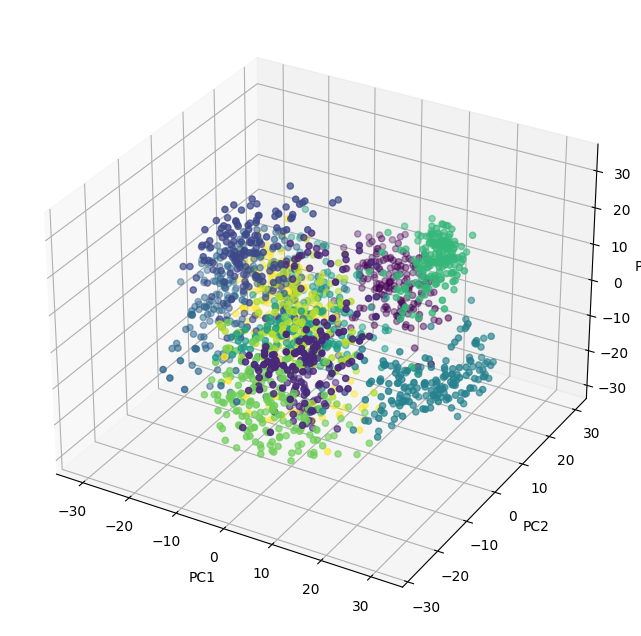

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pixels_scaled_pca_3d[:, 0], pixels_scaled_pca_3d[:, 1], pixels_scaled_pca_3d[:, 2], c=labels, cmap='viridis')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

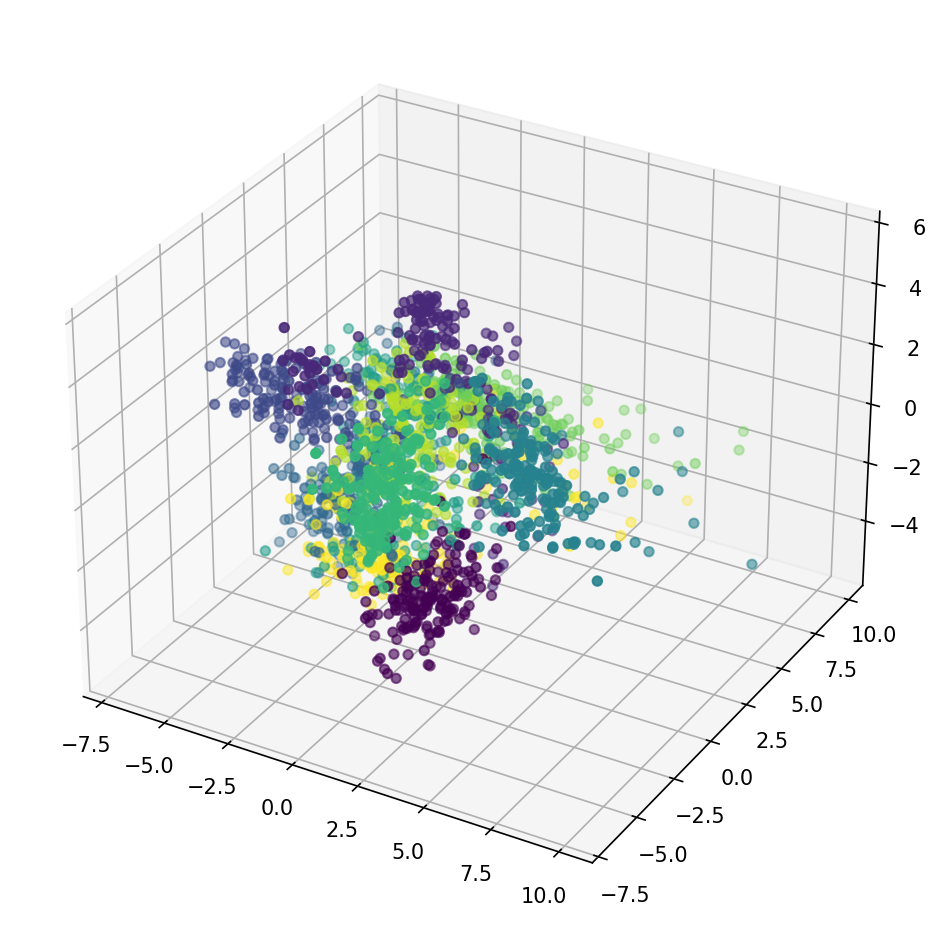

<IPython.core.display.Javascript object>


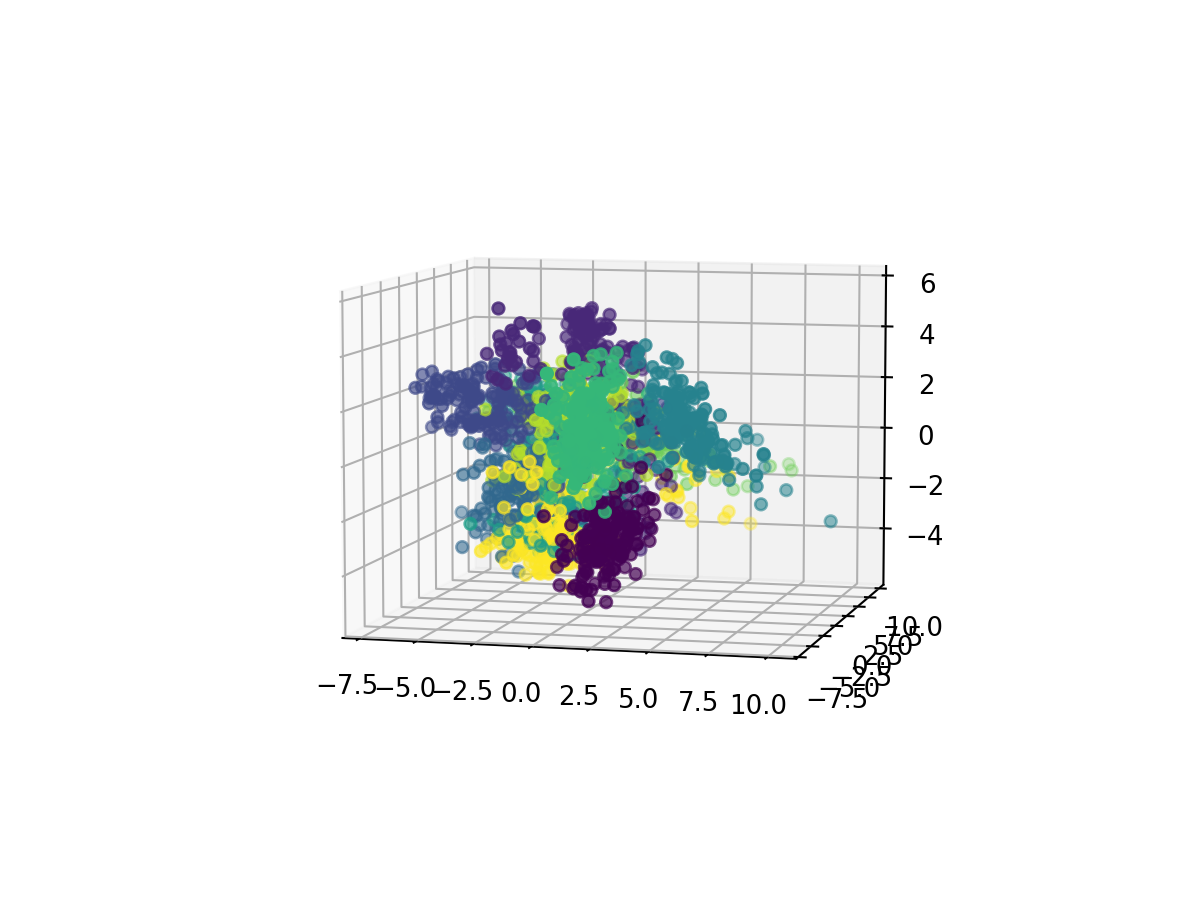

# Great Job!